In [1]:
pip install wordcloud

In [2]:
import warnings
import numpy as np
import pandas as pd
import json
import requests
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [3]:
data=pd.read_csv('instagram_reach.csv')

In [4]:
data=data.iloc[:,1:8]

In [5]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [6]:
data.isna().sum()

S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


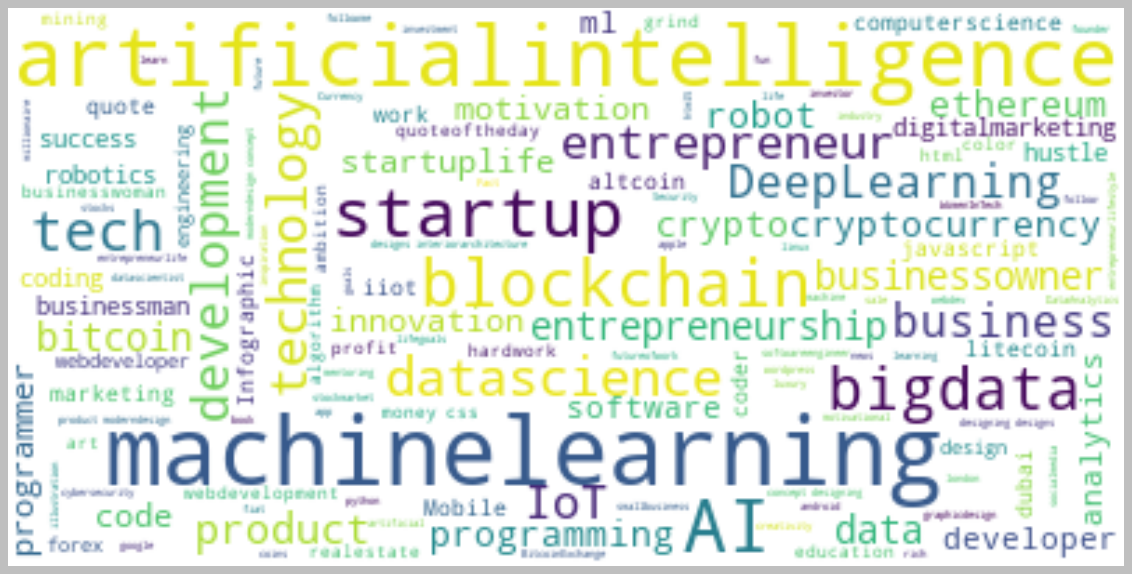

In [9]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(18,16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
data=data.drop(columns=['S.No'])

In [20]:
time=[]
for i in data['Time since posted']:
    sp=i.split(' hours')
    t=sp[0]
    time.append(t)
data['Time since posted']=time 
data['Time since posted']=data['Time since posted'].astype(int)

In [22]:
data.describe()

,Followers,Time since posted,Likes
count,100.00000,100.000000,100.00000
mean,961.96000,3.460000,46.48000
std,1014.62567,3.394648,55.08698
min,11.00000,2.000000,8.00000
25%,252.75000,2.000000,19.00000
50%,612.00000,2.000000,29.00000
75%,1197.00000,3.000000,46.00000
max,4496.00000,24.000000,349.00000


                   Followers  Time since posted     Likes
Followers           1.000000           0.251154  0.266218
Time since posted   0.251154           1.000000  0.609888
Likes               0.266218           0.609888  1.000000


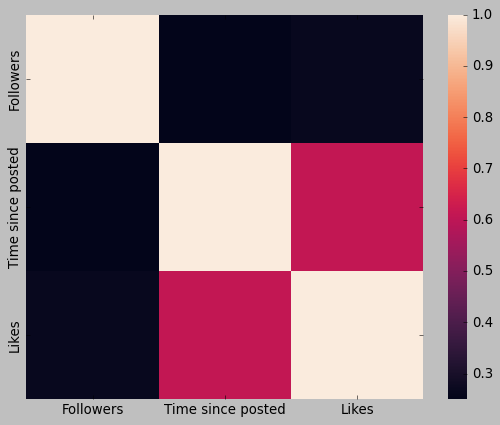

In [26]:
sns.heatmap(data.corr())
print(data.corr())

In [27]:
data=data.drop(columns=['USERNAME','Hashtags','Caption'])

In [28]:
X=data.iloc[:,:-1]
y=data['Likes']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [33]:
models={
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'RandomForest': RandomForestRegressor()
}

In [40]:
def evaluate_model(X_train,X_test,y_train,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        score_r2=round(r2_score(y_test,y_pred)*100,2)
        report[list(models.keys())[i]]=score_r2
        best_score=max(list(report.values()))
        best_model=list(filter(lambda x:report[x]==best_score,report))[0]
    print(f'The best model is {best_model} with r2 score: {best_score}')
    return report
    

In [41]:
evaluate_model(X_train,X_test,y_train,y_test,models)

The best model is RandomForest with r2 score: 68.21


{'LinearRegression': 61.84,
 'Lasso': 62.13,
 'Ridge': 61.87,
 'ElasticNet': 63.22,
 'RandomForest': 68.21}